In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from scipy import stats
from scipy.stats import norm
from scipy.interpolate import UnivariateSpline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import warnings
import itertools
import math
from sympy import *
from tabulate import tabulate
from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('../input/breast-cancer/wisconsin.csv') # import data
# df.columns = ['Sample Code Number', 'Clump_thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'] # adds column names to df

render_graphs = True # want to see the graphs in output? change to True, else will hide all unimportant graphs
show_detailed_output = False # want to see lots of text in output? change to True, else will hide all unimportant graphs

In [2]:
# DAY 1 - Graphing all possibilities & finding the best relationships

'''
if (show_detailed_output):
    print('Finding possibilities...\n')

possibilities = list(itertools.combinations(df.columns, 2)) # find all possible unique graph combinations

print('-> Found', len(possibilities), 'possibilities\n')

#for col, col2 in possibilities: # for each possibility...
#    df[col] = np.log(df[col]) # transform the graph to log
#    data = pd.concat([df[col2], df[col]], axis=1) # merge the x and y axes into a graph
#    if (render_graphs):
#        data.plot.scatter(x=col, y=col2, xlim=(df[col].min(),df[col].max()), ylim=(df[col2].min(),df[col2].max())) # plot the scatter plot & scale it

if (render_graphs & show_detailed_output):
    print('Rendering graphs...\n')

if (show_detailed_output):
    print('Finding best match to log...\n')
    
max_corr_coef = -1 # start at -1, everything else must be higher
best_pair = None # no best pair at the start

for col, col2 in possibilities: # for each possibility...
    dff = df[[col, col2]] # make a new df (dff) but with x and y
    dff[col] = np.log(dff[col]) # transform the graph to log
    data = pd.concat([dff[col2], dff[col]], axis=1) # merge the x and y axes into a graph
    if (render_graphs):
        plt.figure(figsize=(8,6)) # set the graph size
        plt.scatter(data[col], data[col2]) # plot the scatter plot
        # plt.xscale('symlog') # scale x as log
        # plt.yscale('symlog') # scale y as log
        plt.title(f'{col} vs {col2}') # add a title
        plt.xlabel(col) # add x label
        plt.ylabel(col2) # add y label
        plt.show() # render the graph
    
    corr_coef = np.corrcoef(data[col], data[col2])[0, 1] # find how linear the relationship is
    if (show_detailed_output):
        print(f'^ Correlation for {col} vs {col2}: {corr_coef} ^\n')
    
    if corr_coef > max_corr_coef: # if the correlation coefficient's larger than the previous...
        max_corr_coef = corr_coef # replace it to become the new largest
        best_pair = (col, col2) # replace the previous best pair to become new best pair

if (render_graphs & show_detailed_output):
    print('Rendered graphs\n')

print('-> Best match:', best_pair, max_corr_coef, '\n')

print('-> Original graph:\n')

plt.figure(figsize=(8,6)) # set the graph size
plt.scatter(df[best_pair[0]], df[best_pair[1]]) # plot the scatter plot
plt.xscale('symlog') # scale x as log
plt.yscale('symlog') # scale y as log
plt.title(f'{best_pair[0]} vs {best_pair[1]}') # add a title
plt.xlabel(best_pair[0]) # add x label
plt.ylabel(best_pair[1]) # add y label
plt.show() # render the graph

print('\n-> Transformed graph:\n')

dff = df[[best_pair[0], best_pair[1]]] # make a new df (dff) but with x and y
dff[best_pair[0]] = np.log(dff[best_pair[0]]) # transform the graph to log
dff[best_pair[1]] = np.log(dff[best_pair[1]]) # transform the graph to log
p = np.poly1d(np.polyfit(dff[best_pair[0]], dff[best_pair[1]], 1)) # add a red line to best fit the linear data
plt.figure(figsize=(8,6)) # set the graph size
plt.scatter(dff[best_pair[0]], dff[best_pair[1]]) # plot the scatter plot
plt.plot(dff[best_pair[0]], p(dff[best_pair[0]]), 'r--') # plot the red line
plt.xscale('symlog') # scale x as log
plt.yscale('symlog') # scale y as log
plt.title(f'{best_pair[0]} vs {best_pair[1]}') # add a title
plt.xlabel(best_pair[0]) # add x label
plt.ylabel(best_pair[1]) # add y label
plt.show() # render the graph
'''

"\nif (show_detailed_output):\n    print('Finding possibilities...\n')\n\npossibilities = list(itertools.combinations(df.columns, 2)) # find all possible unique graph combinations\n\nprint('-> Found', len(possibilities), 'possibilities\n')\n\n#for col, col2 in possibilities: # for each possibility...\n#    df[col] = np.log(df[col]) # transform the graph to log\n#    data = pd.concat([df[col2], df[col]], axis=1) # merge the x and y axes into a graph\n#    if (render_graphs):\n#        data.plot.scatter(x=col, y=col2, xlim=(df[col].min(),df[col].max()), ylim=(df[col2].min(),df[col2].max())) # plot the scatter plot & scale it\n\nif (render_graphs & show_detailed_output):\n    print('Rendering graphs...\n')\n\nif (show_detailed_output):\n    print('Finding best match to log...\n')\n    \nmax_corr_coef = -1 # start at -1, everything else must be higher\nbest_pair = None # no best pair at the start\n\nfor col, col2 in possibilities: # for each possibility...\n    dff = df[[col, col2]] # make

In [3]:
# DAY 2 - Displaying data as histograms

'''
# print(df[df['Class']==2]) # benign - no cancer
# print(df[df['Class']==4]) # malignant - cancer

print(f"-> ~{round((len(df[df['Class']==4])/len(df['Class']))*100)}% of the samples are malignant - cancerous\n")

for col in df.columns: # for each column...
    if (col != 'Sample Code Number'): # exclude the sample ID
        if (render_graphs):
            x = df[df['Class']==2][col] # set 1st variable color as benign - no cancer
            y = df[df['Class']==4][col] # set 2nd variable color as malignant - cancer
            plt.hist([x, y], bins=np.linspace(min(x.min(), y.min()), max(x.max(), y.max()), 100), alpha=0.5, histtype='barstacked', color=['g', 'r'], label=['Benign', 'Malignant']) # plot the histogram
            plt.legend(loc='upper right') # set the legend location
            plt.title(col) # add a title
            plt.xlabel(col) # add x label
            plt.ylabel('Count #') # add y label
            plt.show() # render the graph
'''

'\n# print(df[df[\'Class\']==2]) # benign - no cancer\n# print(df[df[\'Class\']==4]) # malignant - cancer\n\nprint(f"-> ~{round((len(df[df[\'Class\']==4])/len(df[\'Class\']))*100)}% of the samples are malignant - cancerous\n")\n\nfor col in df.columns: # for each column...\n    if (col != \'Sample Code Number\'): # exclude the sample ID\n        if (render_graphs):\n            x = df[df[\'Class\']==2][col] # set 1st variable color as benign - no cancer\n            y = df[df[\'Class\']==4][col] # set 2nd variable color as malignant - cancer\n            plt.hist([x, y], bins=np.linspace(min(x.min(), y.min()), max(x.max(), y.max()), 100), alpha=0.5, histtype=\'barstacked\', color=[\'g\', \'r\'], label=[\'Benign\', \'Malignant\']) # plot the histogram\n            plt.legend(loc=\'upper right\') # set the legend location\n            plt.title(col) # add a title\n            plt.xlabel(col) # add x label\n            plt.ylabel(\'Count #\') # add y label\n            plt.show() # render

Column Name                  Correlation
---------------------------  -------------
Clump Thickness              71.48%
Uniformity of Cell Size      82.08%
Uniformity of Cell Shape     82.19%
Marginal Adhesion            70.63%
Single Epithelial Cell Size  69.1%
Bare Nuclei                  82.27%
Bland Chromatin              75.82%
Normal Nucleoli              71.87%
Mitoses                      42.34%


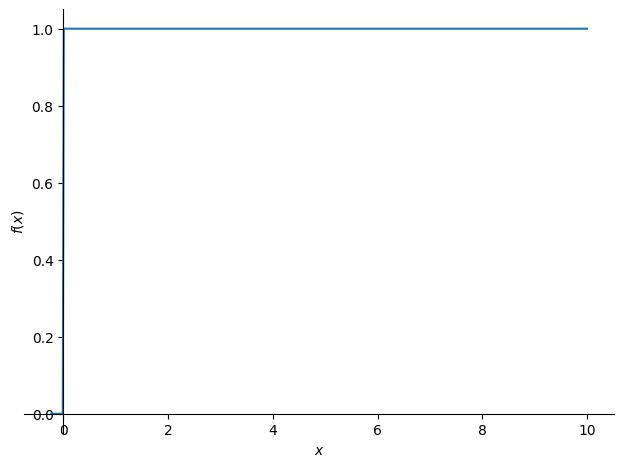

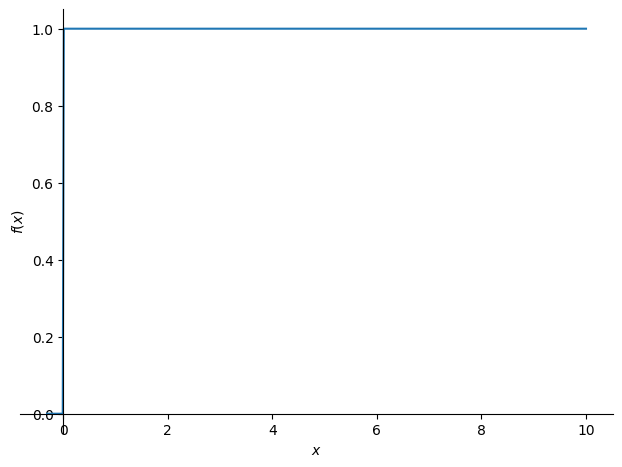

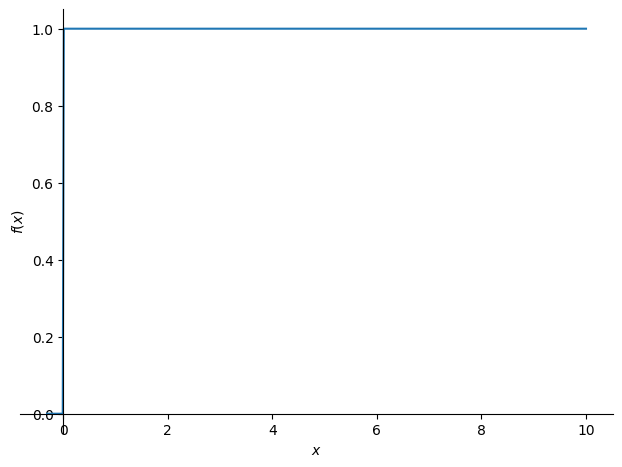

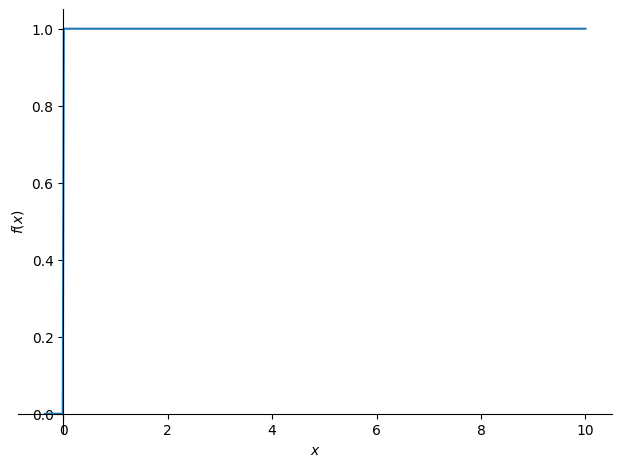

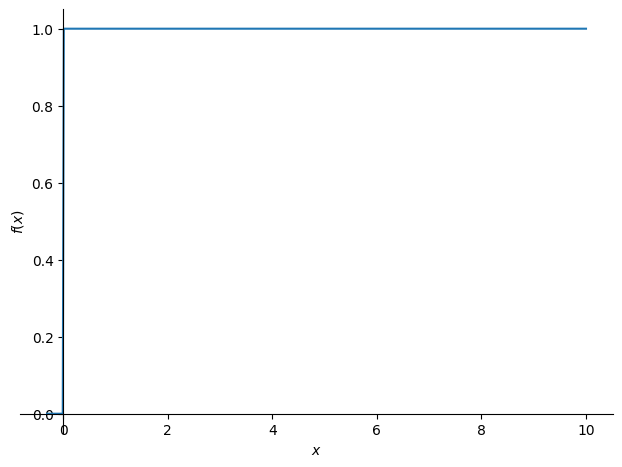

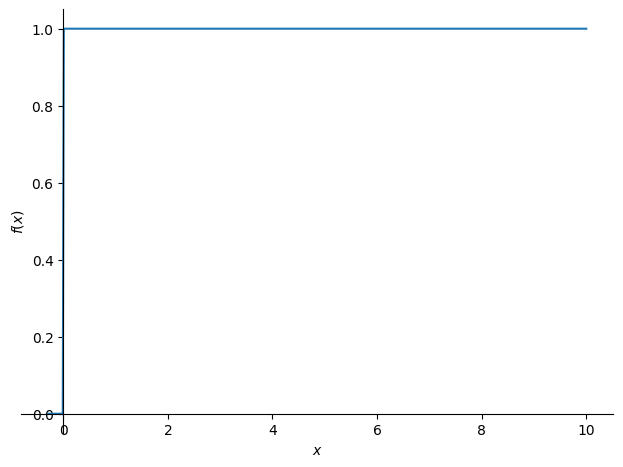

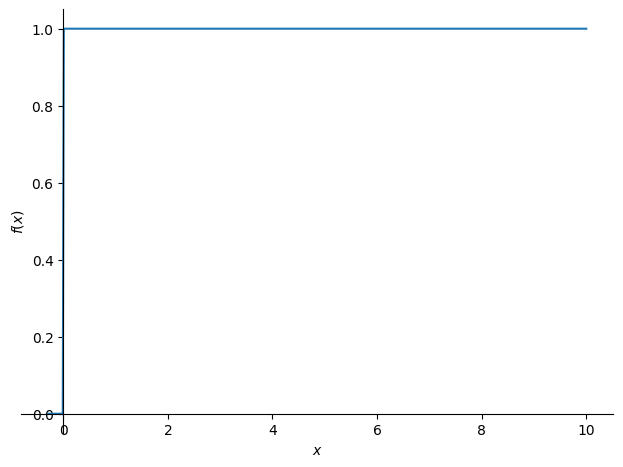

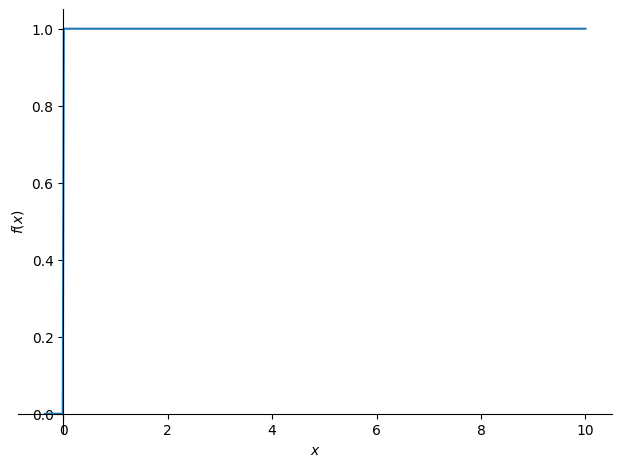

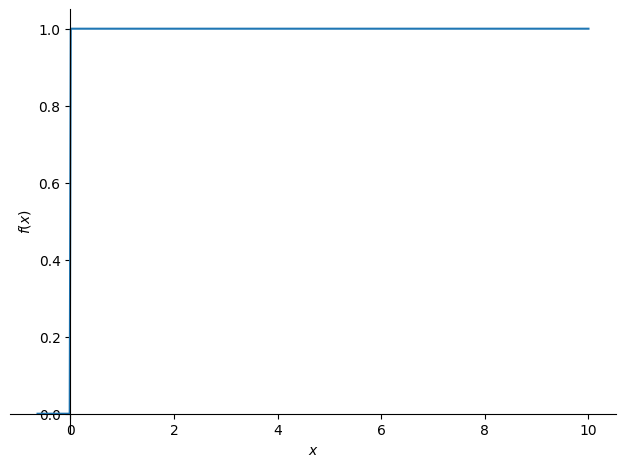

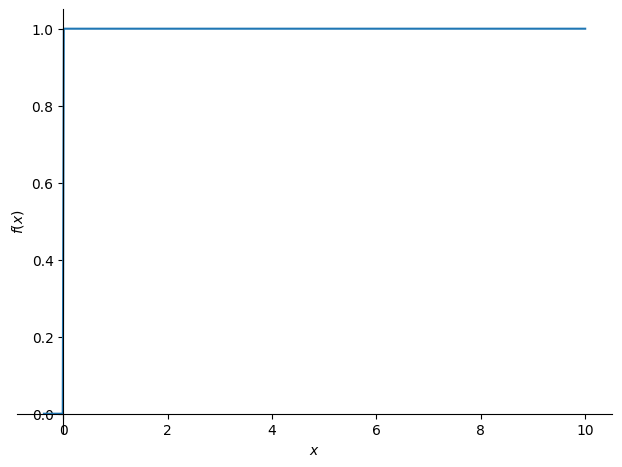

In [4]:
# DAY 3 - Calculating logistic functions and correlations

"""
possibilities = list(itertools.combinations(df.columns, 2)) # find all possible unique graph combinations
for col, col2 in possibilities: # for each possibility...
    if col != 'Sample Code Number': # exclude the sample ID
        x = df[col][df[col] > 0]
        y = df[col2][df[col2] > 0]
        
        polynomial = np.poly1d(np.polyfit(np.log10(x), np.log10(y), 1)) # find best fit of slope and intercept
        slope = polynomial.coefficients[0] # fitted slope
        intercept = polynomial.coefficients[1] # fitted intercept
        
        if (show_detailed_output):
            print(f"\n🔻 log(y) = {slope:.4f} * log(x) + {intercept:.4f} 🔻") # equation: log(y) = m*log(x) + c
        
        y_fit = 10**polynomial(np.log10(x)) # find the fitted y data

        if (render_graphs):
            plt.figure(figsize=(8,6)) # set the graph size
            plt.scatter(x, y, label='Data') # plot the scatter plot
            plt.plot(x, y_fit, 'r*-', label='Fitted Line') # plot the fitted line
            plt.title(f'{col} vs {col2}') # add a title
            plt.yscale('log') # scale x as log
            plt.xscale('log') # scale y as log
            plt.xlabel(col) # add x label
            plt.ylabel(col2) # add y label
            plt.legend() # show the legend
            plt.show() # render the graph
"""

table = []

for col in df.columns:
    if (col != 'Sample Code Number') & (col != 'Class'): # exclude the sample ID
        correlation_matrix = np.corrcoef(df[col], df['Class']) # find the correlation
        table.append([col, f'{round(correlation_matrix[0][1] * 100, 2)}%'])

print(tabulate(table, headers=['Column Name', 'Correlation']))

for col in df.columns:
    if col != 'Sample Code Number': # exclude the sample ID
        x = symbols('x') # define the x symbol
        p = 0 # start p as nothing

        for patient in df[col]: # for each patient...
            p = p + patient # add the patient to the equation

        p = 1 / (1 + exp(-p * x)) # make the equation
        if (show_detailed_output):
            print('\n', col, 'equation:', p)
        if (render_graphs):
            plot(p) # render the graph

In [5]:
# DAY 5 - Finding and plotting Sigmoid function equation

'''
inputs = df.iloc[:, 1:-1]
output = df.iloc[:, -1]
fit = LogisticRegression(penalty='none').fit(inputs, output)

coef = fit.coef_
coef = np.delete(fit.coef_, 3)
intercept = fit.intercept_.flatten()

if (show_detailed_output):
    print("COEFFICIENTS: {0}".format(coef))
    print("INTERCEPT: {0}".format(intercept), '\n')

b0, b1, x = symbols('b0, b1, x')
b0 = fit.intercept_.flatten()
b1, b2, b3, b4, b5, b6, b7, b8 = coef

table = []

rows = len(df)
correctRows = 0
for index, row in df.iterrows():
    num = (b0 + b1 * row[1] + b2 * row[2] + b3 * row[3] + b4 * row[4] + b5 * row[5] + b6 * row[6] + b7 * row[7] + b8 * row[8])
    p = 1 / (1 + exp(-num))
    above0 = (0 > num)[0]
    if (((row['Class']==2) & (not above0)) or ((row['Class']==4) & above0)):
        correct = True
        correctRows = correctRows + 1
    else:
        correct = False
    if (row['Class']==2):
        type = 'Benign'
    else:
        type = 'Malignant'
    # print(f'{type} and {"above 0" if (above0) else "below 0"}:', 'matches' if correct else 'does not match')
    table.append([type, True if above0 else False, correct])
    # print(correct, under0, p, num[0])

print(f'Correct: {correctRows}/{rows} ({round((correctRows/rows)*100, 2)}%)\n')

if (show_detailed_output):
    print(tabulate(table, headers=['Type', 'Above 0', 'Matches']))
'''

'\ninputs = df.iloc[:, 1:-1]\noutput = df.iloc[:, -1]\nfit = LogisticRegression(penalty=\'none\').fit(inputs, output)\n\ncoef = fit.coef_\ncoef = np.delete(fit.coef_, 3)\nintercept = fit.intercept_.flatten()\n\nif (show_detailed_output):\n    print("COEFFICIENTS: {0}".format(coef))\n    print("INTERCEPT: {0}".format(intercept), \'\n\')\n\nb0, b1, x = symbols(\'b0, b1, x\')\nb0 = fit.intercept_.flatten()\nb1, b2, b3, b4, b5, b6, b7, b8 = coef\n\ntable = []\n\nrows = len(df)\ncorrectRows = 0\nfor index, row in df.iterrows():\n    num = (b0 + b1 * row[1] + b2 * row[2] + b3 * row[3] + b4 * row[4] + b5 * row[5] + b6 * row[6] + b7 * row[7] + b8 * row[8])\n    p = 1 / (1 + exp(-num))\n    above0 = (0 > num)[0]\n    if (((row[\'Class\']==2) & (not above0)) or ((row[\'Class\']==4) & above0)):\n        correct = True\n        correctRows = correctRows + 1\n    else:\n        correct = False\n    if (row[\'Class\']==2):\n        type = \'Benign\'\n    else:\n        type = \'Malignant\'\n    # pr

In [6]:
# DAY 6 - Making models of all possibilities and getting accuracies
# WARNING - Long process

df2 = df.drop('Class', axis=1).drop('Sample Code Number', axis=1).drop('Uniformity of Cell Shape', axis=1)

"""
possibilities = list(itertools.combinations(df2.columns, 8)) # find all possible unique graph combinations

print('-> Found', len(possibilities), 'possibilities\n')

for col1, col2, col3, col4, col5, col6, col7, col8 in possibilities:
    print(col1, 'x', col2, 'x', col3, 'x', col4, 'x', col5, 'x', col6, 'x', col7, 'x', col8)

possibilities = list(itertools.permutations(df2.columns, 8)) # find all possible unique graph combinations

print('-> Found', len(possibilities), 'possibilities\n')

for col1, col2, col3, col4, col5, col6, col7, col8 in possibilities[:10]:
    print(col1, 'x', col2, 'x', col3, 'x', col4, 'x', col5, 'x', col6, 'x', col7, 'x', col8)
"""

def combinations(original_list):
    num_subsets = 2 ** len(original_list)
    subsets = []
    for subset_index in range(num_subsets):
        subset = []
        for index in range(len(original_list)):
            if (subset_index & (1 << index)) != 0:
                subset.append(original_list[index])
        subsets.append(subset)
    return subsets

possibilities2 = combinations(df2.columns)

print('-> Found', len(possibilities2), 'possibilities\n')
    
least_aic = 100
least_possibility = []
least_possibilities = pd.DataFrame(columns=['Possibility', 'AIC'])

if (show_detailed_output):
    print('Running long process...\n')

def calculate_AIC(n,mse,num_parameters):
    aic = n * log(mse) + 2 * num_parameters
    return aic

for i in tqdm(range(len(possibilities2))):
    possibility = possibilities2[i]
    if (show_detailed_output):
        print(possibility)
    Z = []
    if (len(possibility) > 0):
        strings = ()
        for col in possibility:
            strings = strings + (f'["{possibility[0]}"]',)
        string = "+".join(strings)
        string = f'df2[{string}]'
        exec(f'X = {string}')
    else:
        exec(f'X = df2')

    for j in range(len(df2)):
        d = []
        for col in df2.columns:
            d.append(df2.loc[j][col])
        Z += [d]

    sc = StandardScaler()
    sc.fit(X)
    x = sc.transform(X)
    X = Z
    y = df[['Class']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    lr = LogisticRegression()
    lr.fit(X_train, y_train.values.ravel())
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred) / 4
    n = len(y_test)
    num_parameters = len(lr.coef_[0]) + 1

    aic = calculate_AIC(n, mse, num_parameters)

    if (show_detailed_output):
        print(f"Train Accuracy: {round(metrics.accuracy_score(y_train, lr.predict(X_train)) * 100, 5)}%")
        print(f"Train Confusion matrix: {metrics.confusion_matrix(y_train, lr.predict(X_train))}")
        print(f"Train Classificiation report: {metrics.classification_report(y_train, lr.predict(X_train))}")
        print(f"Test Accuracy: {round(metrics.accuracy_score(y_test, lr.predict(X_test)) * 100, 5)}%")
        print(f"Test Confusion matrix: {metrics.confusion_matrix(y_test,lr.predict(X_test))}")
        print(f"Test Classification report: {metrics.classification_report(y_test, lr.predict(X_test))}")
        print(f"Intercept: {lr.intercept_}")
        print(f'AIC: {aic}\n')

    least_possibilities.loc[len(least_possibilities.index)] = [possibility, aic] 

    if (aic < least_aic):
        least_aic = aic
        least_possibility = possibility

if (show_detailed_output):
    print('\nFinished long process')
print(f'\n-> Least AIC is {least_aic} at {least_possibility}\n')
least_possibilities = least_possibilities.sort_values(by=['AIC'], ascending=True)
if (show_detailed_output):
    print(least_possibilities[2:5])

-> Found 256 possibilities



  0%|          | 0/256 [00:00<?, ?it/s]


-> Least AIC is -563.811182516834 at []



                                          Possibility                AIC
66         [Uniformity of Cell Size, Normal Nucleoli]  -544.210293152246
10  [Uniformity of Cell Size, Single Epithelial Ce...  -544.210293152246
34         [Uniformity of Cell Size, Bland Chromatin]  -544.210293152246


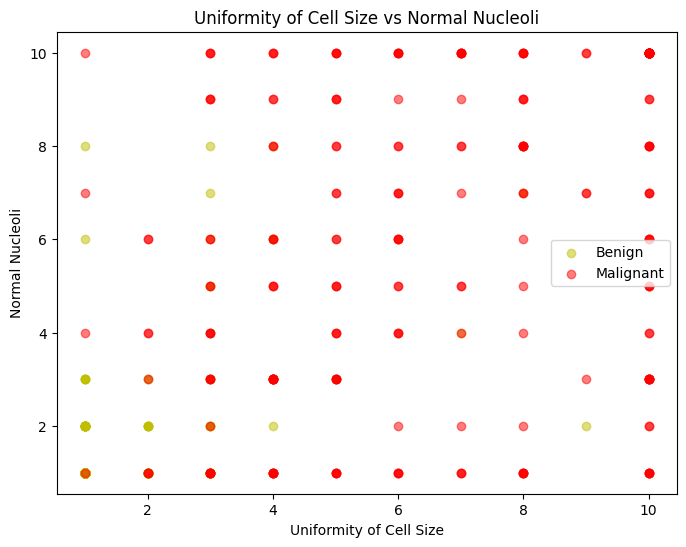

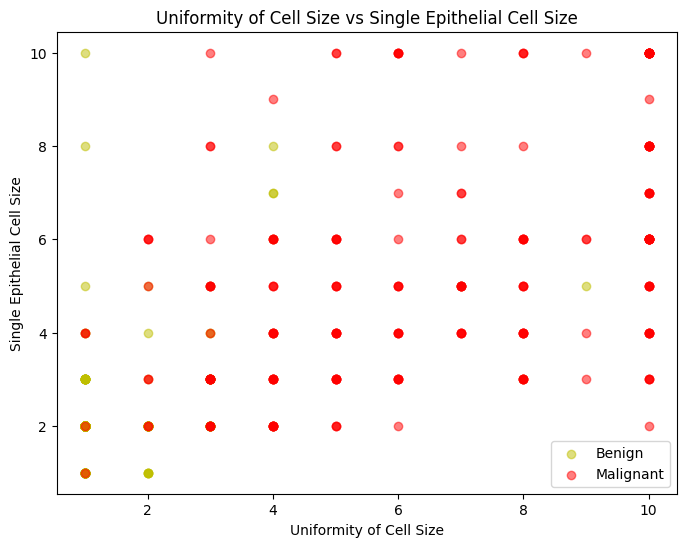

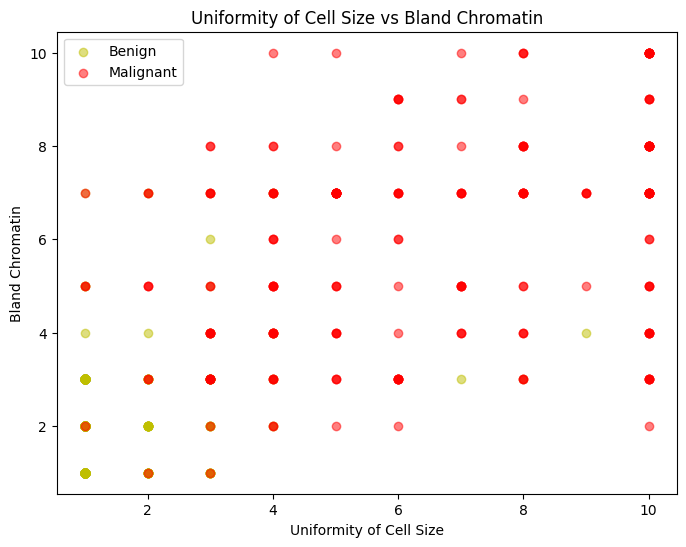

In [7]:
# DAY 7 - Find and graph the best possibilities

print(least_possibilities[2:5])

for row in least_possibilities[2:5]['Possibility']:
    dff = df[[row[0], row[1]]]
    data = pd.concat([dff[row[1]], dff[row[0]]], axis=1)

    benign_data = data[df['Class'] == 2]
    malignant_data = data[df['Class'] == 4]

    if (render_graphs):
        plt.figure(figsize=(8, 6))
        plt.scatter(benign_data[row[0]], benign_data[row[1]], alpha=0.5, color='y', label='Benign')
        plt.scatter(malignant_data[row[0]], malignant_data[row[1]], alpha=0.5, color='r', label='Malignant')
        plt.title(f'{row[0]} vs {row[1]}')
        plt.xlabel(row[0])
        plt.ylabel(row[1])
        plt.legend()
        plt.show()